# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

# Tratamiento de categóricas

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
df = pd.concat([df, pd.get_dummies(df["Gender"], prefix="gender"), pd.get_dummies(df["City Tier"], prefix="city")], axis=1)
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,gender_Female,gender_Male,city_Tier 1,city_Tier 2,city_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [4]:
df = df.drop(["City Tier", "Gender", "gender_Female", "city_Tier 1"], axis=1)

In [5]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,gender_Male,city_Tier 2,city_Tier 3
0,TXN001,42,10,7313,627.668127,5,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,3254.160485,0,1,0


In [6]:
features_cols=[i for i in df.columns.values.tolist() if i not in ["Transaction ID", " Items ", "Total Spend"]]
features_cols

['Age ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'gender_Male',
 'city_Tier 2',
 'city_Tier 3']

In [7]:
X = df[features_cols]
Y = df["Total Spend"]

In [40]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print(lm.intercept_)
print(lm.coef_)

-390.4482034006869
[ 6.42429817e+00  1.47442269e-01  1.56391583e-01  7.72149205e+02
  2.66177413e+02 -2.63525416e+01 -2.08782973e+02]


In [42]:
list(zip(features_cols, lm.coef_))

[('Age ', 6.424298167612817),
 ('Monthly Income', 0.1474422689744863),
 ('Transaction Time', 0.15639158306366413),
 ('Record', 772.1492053631366),
 ('gender_Male', 266.17741326341365),
 ('city_Tier 2', -26.35254163208458),
 ('city_Tier 3', -208.7829732971258)]

In [43]:
print(lm.score(X, Y))

0.9187458997709432


In [46]:
df["y_pred"] = -390.4482034006869 + df["Age "]*6.424298167612817 + df["Monthly Income"] * 0.1474422689744863 + df["Transaction Time"] * 0.15639158306366413 +  df["Record"] * 772.1492053631366 + df["gender_Male"] * 266.17741326341365 + df["city_Tier 2"] * -26.35254163208458 + df["city_Tier 3"] * -208.7829732971258 

In [47]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,gender_Male,city_Tier 2,city_Tier 3,y_pred
0,TXN001,42,10,7313,627.668127,5,4198.385084,0,0,0,4916.525671
1,TXN002,24,8,17747,126.904567,3,4134.976648,0,1,0,4690.334781
2,TXN003,47,11,22845,873.469701,2,5166.614455,1,1,0,5200.539037
3,TXN004,50,11,18552,380.219428,7,7784.447676,0,0,0,8130.623235
4,TXN005,60,2,14439,403.374223,2,3254.160485,0,1,0,3704.958811


In [48]:
n = df.shape[0]
k = len(features_cols)
SSD = np.sum((df["Total Spend"] - df["y_pred"])**2)
RSE = np.sqrt(SSD / (n-k-1))
ratioMean = RSE / np.mean(df["Total Spend"])
print("SSD: ", SSD, "; RSE: ", RSE)
print("rationMean: ", ratioMean)

SSD:  1503788028.5340152 ; RSE:  799.2636874198926
rationMean:  0.12968372694118777


# Transformación de variables para conseguir relación lineal

In [8]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.shape

(406, 9)

In [9]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [57]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
data_auto = data_auto.dropna()

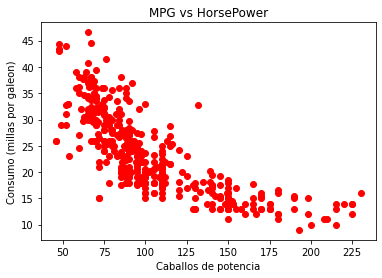

In [62]:
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeon)")
plt.title("MPG vs HorsePower")
plt.show()

## Modelo Lineal

In [11]:
x = data_auto["horsepower"].values.reshape(-1,1)
y = data_auto["mpg"].values.reshape(-1,1)

In [69]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
y_preds = lm.predict(x)

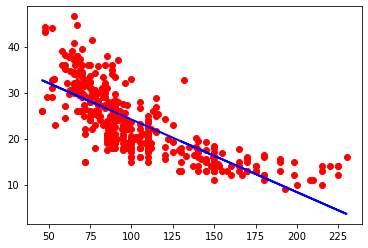

In [73]:
plt.plot(x,y,"ro")
plt.plot(x, y_preds, "b", linewidth=2)
plt.show()

In [71]:
lm.score(x, y)

0.6059482578894348

In [74]:
n = data_auto.shape[0]
k = 1
SSD = np.sum((y-y_preds)**2)
RSE = np.sqrt(SSD / (n-k-1))
y_mean = np.mean(y)
ratioMean = RSE / y_mean
print("SSD: ", SSD, "; RSE: ", RSE)
print("Y_mean: ", y_mean, "; ratioMean: ", ratioMean)

SSD:  9385.915871932419 ; RSE:  4.90575691954594
Y_mean:  23.445918367346938 ; ratioMean:  0.20923714066914834


## Modelo Cuadrático

$$ mpg = \alpha + \beta \cdot horsePower^2 $$

In [19]:
x = data_auto["horsepower"].values.reshape(-1,1)
y = data_auto["mpg"].values.reshape(-1,1)

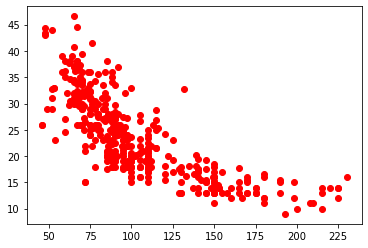

In [20]:
plt.plot(x,y,"ro")
plt.show()

In [21]:
x_inv = 1/x
lm = LinearRegression()
lm.fit(x_inv, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
lm.score(x_inv,y)

0.6671084785591674

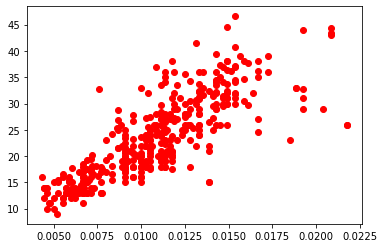

In [23]:
plt.plot(x_inv,y, "ro")
plt.show()

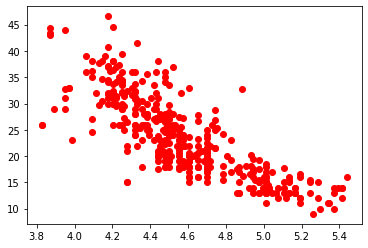

In [24]:
plt.plot(np.log(x),y, "ro")
plt.show()

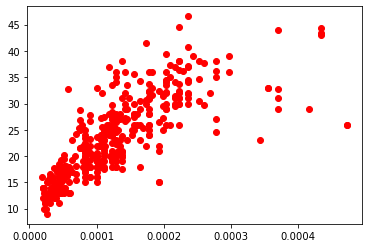

In [25]:
plt.plot(x**(-2),y, "ro")
plt.show()

## Modelo regresión lineal y cuadrático
$$ mpg = \alpha + \beta_1 \cdot horsePower + \beta_2 \cdot horsePower^2 $$

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [27]:
poly = PolynomialFeatures(degree=2)

In [28]:
x_poly = poly.fit_transform(x)

In [30]:
lm = linear_model.LinearRegression()
lm.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lm.score(x_poly, y)

0.6875590305127517

In [32]:
lm.intercept_

array([56.9000997])

In [33]:
lm.coef_

array([[ 0.        , -0.46618963,  0.00123054]])

In [36]:
def regressionReport(lm, x, y, k):
    n = x.shape[0]
    SSD = np.sum((y-lm.predict(x))**2)
    RSE = np.sqrt(SSD / (n-k-1))
    y_mean = np.mean(y)
    ratioMean = RSE / y_mean
    print("SSD: ", SSD, "; RSE: ", RSE)
    print("Y_mean: ", y_mean, "; ratioMean: ", ratioMean)

In [37]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    lm = linear_model.LinearRegression()
    lm.fit(x_poly, y)
    print("Para un poly de degree=", i, ", tenemos un R2=", lm.score(x_poly, y))
    regressionReport(lm, x_poly, y, i)
    print("-"*60)
    print('\n')

Para un poly de degree= 2 , tenemos un R2= 0.6875590305127517
SSD:  7442.029411785949 ; RSE:  4.37392055336649
Y_mean:  23.445918367346938 ; ratioMean:  0.18655360326844936
------------------------------------------------------------


Para un poly de degree= 3 , tenemos un R2= 0.6882136931259101
SSD:  7426.436007278479 ; RSE:  4.374962741307763
Y_mean:  23.445918367346938 ; ratioMean:  0.1865980539879709
------------------------------------------------------------


Para un poly de degree= 4 , tenemos un R2= 0.6893436054929452
SSD:  7399.522631987085 ; RSE:  4.3726666371159
Y_mean:  23.445918367346938 ; ratioMean:  0.18650012205133754
------------------------------------------------------------


Para un poly de degree= 5 , tenemos un R2= 0.6967390038720708
SSD:  7223.371686291169 ; RSE:  4.325898536837565
Y_mean:  23.445918367346938 ; ratioMean:  0.18450539957787412
------------------------------------------------------------




# Problema de outliers

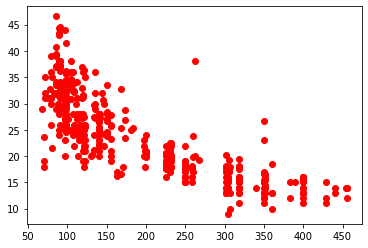

In [39]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [40]:
x = data_auto["displacement"].values.reshape(-1,1)
y = data_auto["mpg"].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lm.score(x,y)

0.6482294003193044

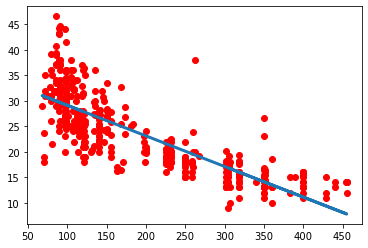

In [43]:
plt.plot(x, y, "ro")
plt.plot(x, lm.predict(x), linewidth=3)
plt.show()

In [45]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [46]:
data_auto[(data_auto["displacement"]>340)&(data_auto["mpg"]>20)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [50]:
data_auto.drop([395, 305, 372], axis=0, inplace=True)

R2:  0.669953553757197


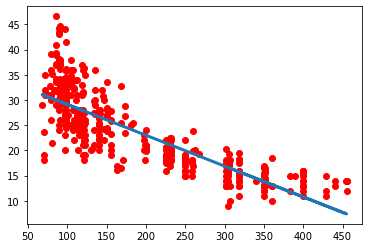

In [51]:
x = data_auto["displacement"].values.reshape(-1,1)
y = data_auto["mpg"].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)
print("R2: ", lm.score(x,y))

plt.plot(x, y, "ro")
plt.plot(x, lm.predict(x), linewidth=3)
plt.show()

# Problemas y consideraciones

-  Analizar Residuos 
    - Distribución simétrica o concentrados en el centro (vs y).
    - Sin patron
- Si no se cumplen las anteriores
    - Relacion de variables no lineal
    - Existen outliers
    - Existen puntos con valores de predicho elevados
    - Varianza no constante en los términos del error
    - Apalancamiento muy elevado (potenciales outliers)